In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
df = pd.read_csv("../data/raw/random-generated.csv")
df.head()


,num_rooms,area,age,distance_city_center,price
0,1,92,33,14,940122
1,3,107,33,37,722245
2,2,239,28,27,109825
3,4,103,29,47,618166
4,4,212,28,43,678070


# Simple EDA

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   num_rooms             10000 non-null  int64
 1   area                  10000 non-null  int64
 2   age                   10000 non-null  int64
 3   distance_city_center  10000 non-null  int64
 4   price                 10000 non-null  int64
dtypes: int64(5)
memory usage: 390.8 KB


In [21]:
df.num_rooms.describe()

count    10000.000000
mean         2.521800
std          1.123232
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: num_rooms, dtype: float64

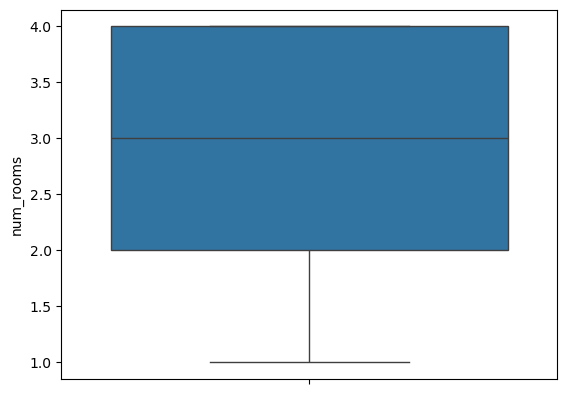

In [22]:
sns.boxplot(df.num_rooms);

In [23]:
df.area.describe()

count    10000.000000
mean       173.887600
std         71.956723
min         50.000000
25%        112.000000
50%        174.000000
75%        236.000000
max        299.000000
Name: area, dtype: float64

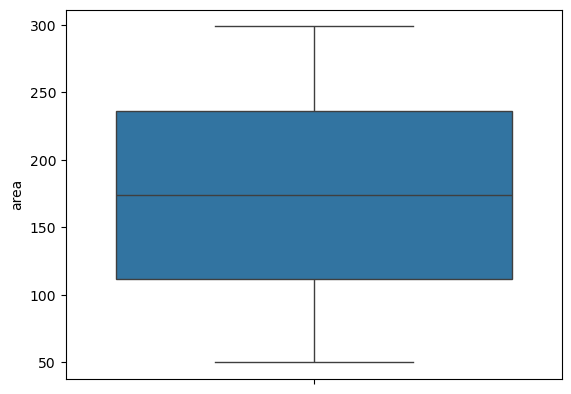

In [24]:
sns.boxplot(df.area);


In [25]:
df.age.describe()

count    10000.000000
mean        19.876700
std         11.326479
min          1.000000
25%         10.000000
50%         20.000000
75%         30.000000
max         39.000000
Name: age, dtype: float64

<Axes: ylabel='age'>

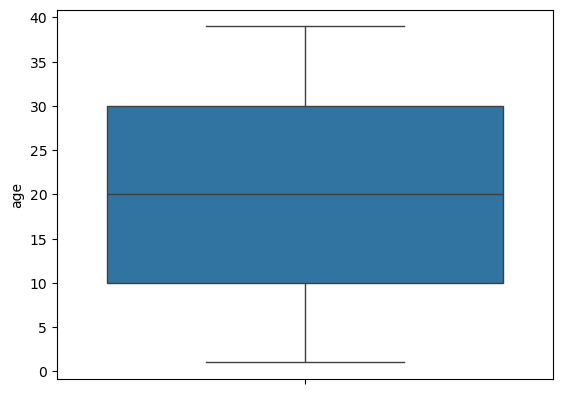

In [26]:
sns.boxplot(df.age)

In [27]:
df.distance_city_center.describe()

count    10000.000000
mean        27.067200
std         13.031288
min          5.000000
25%         16.000000
50%         27.000000
75%         38.000000
max         49.000000
Name: distance_city_center, dtype: float64

<Axes: ylabel='distance_city_center'>

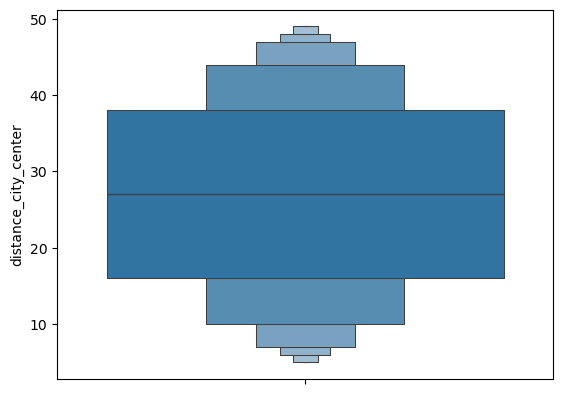

In [28]:
sns.boxenplot(df.distance_city_center)

In [29]:
df.price.describe()

count     10000.000000
mean     550534.584600
std      259013.854287
min      100078.000000
25%      325303.500000
50%      552516.000000
75%      771748.500000
max      999899.000000
Name: price, dtype: float64

<Axes: ylabel='price'>

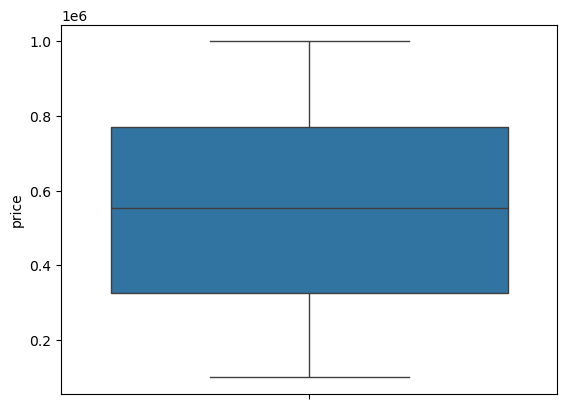

In [30]:
sns.boxplot(df.price)

# Modeling

In [31]:
scaler = StandardScaler()


X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaled = scaler.fit_transform(X)


x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=123)

In [32]:
model = LinearRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Mean Absolute ERROR: ", mean_absolute_error(y_pred=y_pred, y_true=y_test))
print("Mean squared ERROR: ", mean_squared_error(y_pred=y_pred, y_true=y_test))
print("R2 Score: ", r2_score(y_pred=y_pred, y_true=y_test))

Mean Absolute ERROR:  220934.16813152196
Mean squared ERROR:  66158750213.08221
R2 Score:  -0.00020480001913036894


In [33]:
model = LogisticRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Mean Absolute ERROR: ", mean_absolute_error(y_pred=y_pred, y_true=y_test))
print("Mean squared ERROR: ", mean_squared_error(y_pred=y_pred, y_true=y_test))
print("R2 Score: ", r2_score(y_pred=y_pred, y_true=y_test))

/home/mohammad/.local/lib/python3.10/site-packages/sklearn/utils/multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")


Mean Absolute ERROR:  296824.8525
Mean squared ERROR:  133125890472.0405
R2 Score:  -1.0126310462047736


In [34]:
model = SVR()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Mean Absolute ERROR: ", mean_absolute_error(y_pred=y_pred, y_true=y_test))
print("Mean squared ERROR: ", mean_squared_error(y_pred=y_pred, y_true=y_test))
print("R2 Score: ", r2_score(y_pred=y_pred, y_true=y_test))

Mean Absolute ERROR:  220878.38093523987
Mean squared ERROR:  66145370821.34397
R2 Score:  -2.5269744490241663e-06
